## Importações e definições

In [358]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
from biokit.viz import corrplot

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import csr_matrix, vstack

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

def min_max_scaller(data):
    print(data.min(), data.max())
    return (data - data.min()) / (data.max() - data.min())

def plot_metrica(xdata, ydata, zdata, xlabel, ylabel, zlabel):
    fig = go.Figure()

    if zdata != []:
        fig.add_trace(go.Scatter3d(
            x = xdata,
            y = ydata,
            z = zdata
        ))

        fig.update_layout(scene = dict(
            xaxis_title = xlabel,
            yaxis_title = ylabel,
            zaxis_title = zlabel
        ))
    else:
        fig.add_trace(go.Scatter(
            x = xdata,
            y = ydata
        ))

        fig.update_layout(
            xaxis_title = xlabel,
            yaxis_title = ylabel
        )

    fig.update_layout(width = 600, height = 600)
    fig.show()
        
heroes = pd.read_csv('..\\Bases de Dados\\hero_db.csv')
heroes2 = heroes.drop(columns = ['name', 'Gender', 'Publisher_group_by', 'Race_group_by'])
heroes2.replace({True: 1, False: 0}, inplace = True)
heroes2.head()

,Physical Skills,Energy Manipulation,Elemental Powers,Mental and Psychic Powers,Space-Time Manipulation,Body Transformation,Supernatural Forces,Tech Skills,Perception Skills,Locomotion Skills,Combat Skills,Gender_Female,Gender_Male,Race_group_by_Alien,Race_group_by_Artificial Beings,Race_group_by_Divine and Semidivine,Race_group_by_Genetically Altered Beings,Race_group_by_Human and Variation,Race_group_by_Mythical,Race_group_by_Not Identified,Race_group_by_Underwater,Eye_Color_group_by_-,Eye_Color_group_by_blue,Eye_Color_group_by_brown,Eye_Color_group_by_green,Eye_Color_group_by_red,Hair_Color_group_by_-,Hair_Color_group_by_Black,Hair_Color_group_by_Brown,Hair_Color_group_by_No Hair,Hair_Color_group_by_Red,Height,Weight,Publisher_group_by_DC Comics,Publisher_group_by_Marvel Comics,Alignment_bad,Alignment_good,Alignment
0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,203.0,441.0,0,1,0,1,good
1,9,0,0,2,0,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,191.0,65.0,0,0,0,1,good
2,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,185.0,90.0,1,0,0,1,good
3,4,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,203.0,441.0,0,1,1,0,bad
4,6,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,193.0,122.0,0,1,1,0,bad


## Normalização

In [359]:
# Usei o min_max_scaler pois ele deixa os valores entre 0 e 1. O standard_scaler pode gerar valores negativos, que não são aceitos no Multinomial Naive Bayes

heroes2_normalized = heroes2.copy()

heroes2_normalized['Height'] = min_max_scaller(heroes2['Height'])
heroes2_normalized['Weight'] = min_max_scaller(heroes2['Weight'])

display(heroes2_normalized.describe())
display(heroes2_normalized.head())

15.2 975.0
4.0 198416000.0


,Physical Skills,Energy Manipulation,Elemental Powers,Mental and Psychic Powers,Space-Time Manipulation,Body Transformation,Supernatural Forces,Tech Skills,Perception Skills,Locomotion Skills,Combat Skills,Gender_Female,Gender_Male,Race_group_by_Alien,Race_group_by_Artificial Beings,Race_group_by_Divine and Semidivine,Race_group_by_Genetically Altered Beings,Race_group_by_Human and Variation,Race_group_by_Mythical,Race_group_by_Not Identified,Race_group_by_Underwater,Eye_Color_group_by_-,Eye_Color_group_by_blue,Eye_Color_group_by_brown,Eye_Color_group_by_green,Eye_Color_group_by_red,Hair_Color_group_by_-,Hair_Color_group_by_Black,Hair_Color_group_by_Brown,Hair_Color_group_by_No Hair,Hair_Color_group_by_Red,Height,Weight,Publisher_group_by_DC Comics,Publisher_group_by_Marvel Comics,Alignment_bad,Alignment_good
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000
mean,3.671937,1.067194,0.213439,0.881423,0.205534,0.537549,0.171937,0.110672,0.770751,1.227273,0.727273,0.290514,0.691700,0.051383,0.029644,0.029644,0.114625,0.424901,0.023715,0.300395,0.011858,0.073123,0.367589,0.221344,0.132411,0.073123,0.071146,0.274704,0.150198,0.102767,0.086957,0.178699,1.979982e-03,0.310277,0.590909,0.284585,0.675889
std,2.863060,1.695489,0.578404,1.385130,0.639654,0.956258,0.483472,0.332415,1.618829,1.241895,0.977331,0.454449,0.462248,0.220997,0.169772,0.169772,0.318884,0.494817,0.152312,0.458884,0.108353,0.260595,0.482626,0.415562,0.339273,0.260595,0.257323,0.446807,0.357619,0.303955,0.282050,0.061061,4.445531e-02,0.463065,0.492153,0.451663,0.468505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164409,2.973551e-07,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174828,3.981534e-07,0.000000,1.000000,0.000000,1.000000
75%,6.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.180038,5.241513e-07,1.000000,1.000000,1.000000,1.000000
max,14.000000,9.000000,5.000000,9.000000,5.000000,5.000000,3.000000,2.000000,9.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


,Physical Skills,Energy Manipulation,Elemental Powers,Mental and Psychic Powers,Space-Time Manipulation,Body Transformation,Supernatural Forces,Tech Skills,Perception Skills,Locomotion Skills,Combat Skills,Gender_Female,Gender_Male,Race_group_by_Alien,Race_group_by_Artificial Beings,Race_group_by_Divine and Semidivine,Race_group_by_Genetically Altered Beings,Race_group_by_Human and Variation,Race_group_by_Mythical,Race_group_by_Not Identified,Race_group_by_Underwater,Eye_Color_group_by_-,Eye_Color_group_by_blue,Eye_Color_group_by_brown,Eye_Color_group_by_green,Eye_Color_group_by_red,Hair_Color_group_by_-,Hair_Color_group_by_Black,Hair_Color_group_by_Brown,Hair_Color_group_by_No Hair,Hair_Color_group_by_Red,Height,Weight,Publisher_group_by_DC Comics,Publisher_group_by_Marvel Comics,Alignment_bad,Alignment_good,Alignment
0,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.195666,2.202443e-06,0,1,0,1,good
1,9,0,0,2,0,0,0,0,1,2,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0.183163,3.074349e-07,0,0,0,1,good
2,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.176912,4.334328e-07,1,0,0,1,good
3,4,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.195666,2.202443e-06,0,1,1,0,bad
4,6,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0.185247,5.947101e-07,0,1,1,0,bad


## Análise de Correlação

C:\Users\joaop\AppData\Local\Temp\ipykernel_7696\714765132.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


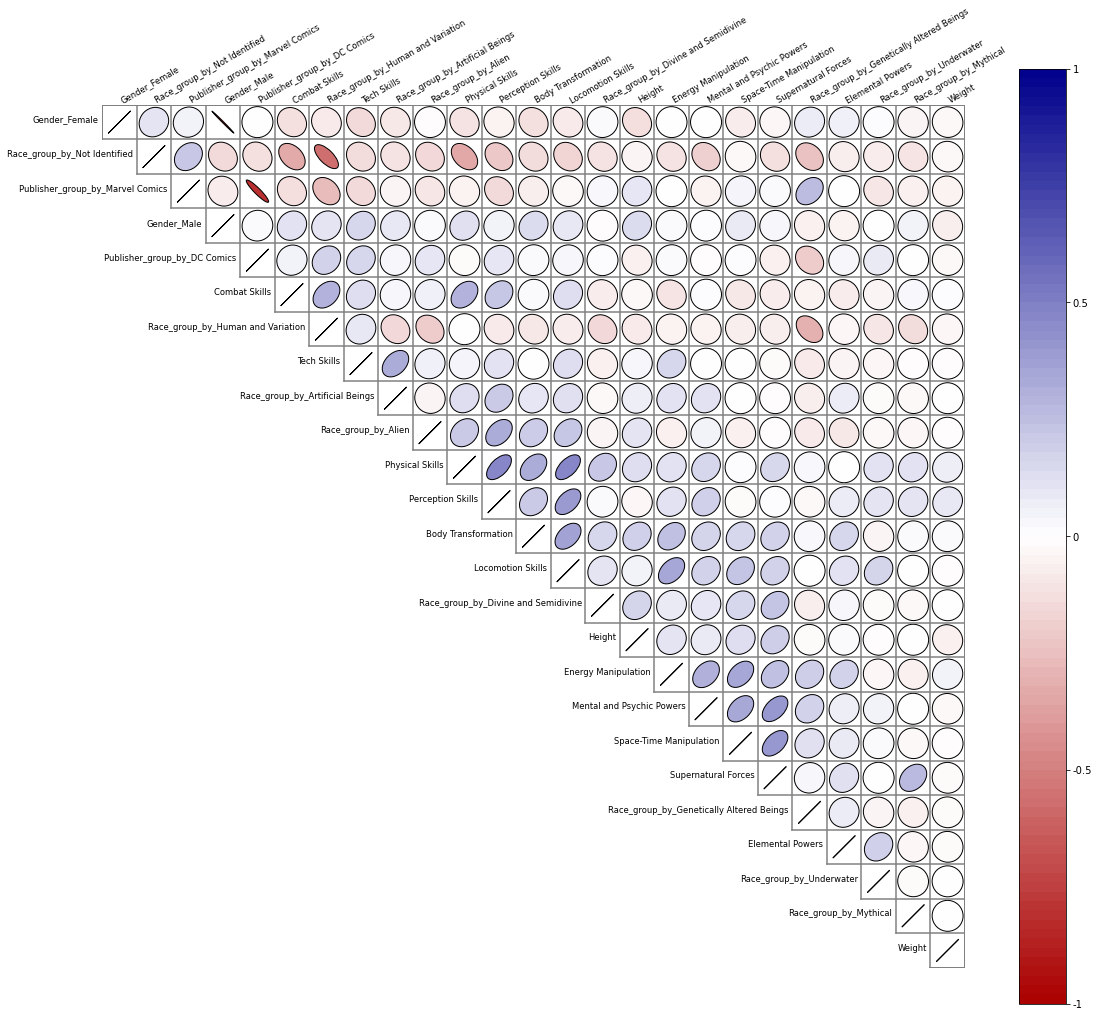

In [360]:
# Analisando a matriz de correlação das variáveis selecionadas, percebemos que as únicas correlações fortes existentes ocorrem entre dois valores da mesma variavel categórica.
# Por exemplo: Gender_Male possui correlação total negativa com Gender_Female, e o mesmo acontece para Publisher_Marvel e Publisher_DC, ou cores de olhos e cabelo.
# Deste modo, não precisamos remover mais nenhuma variável

# OBS: A variável name não agrega nenhum valor na clusterização ou classificação dos personagens, então ela não será utilizada nos modelos treinados

# Uma coisa que achei bastante estranha: Weight e Height praticamente não possuem correlação nenhuma, e eu esperava que devesse haver uma forte correlação positiva entre essas duas variaveis

# Quero agrupar os personagens de acordo com suas características unicas: poderes, universo (editora) e raça. Não Creio que informações como cor dos olhos ou cabelos possa
# ter algum efeito relevante no alinhamento ou nos poderes de cada um. Também são informações muito genéricas: um homem mal com poderes de fogo pode ter cabelos e olhos da
# mesma cor que uma mulher boa com poderes psiquicos. Creio que a raça do personagem possa fornecer informações sobre sua aparência e estatura corporal e também impactar
# na cultura, forma de pensar e agir do personagem (o que pode afetar diretamente seu alinhamento). Assim, irei desconsiderar as informações de cor de olhos e cabelos.
# Assim, também conseguimos reduzir um pouco mais a dimensionalidade dos dados, auxiliando na performance da clusterização.

heroes2_normalized.drop(columns = ['Eye_Color_group_by_-', 'Eye_Color_group_by_blue', 'Eye_Color_group_by_brown', 'Eye_Color_group_by_green',
                                    'Eye_Color_group_by_red', 'Hair_Color_group_by_-', 'Hair_Color_group_by_Black', 'Hair_Color_group_by_Brown',
                                    'Hair_Color_group_by_No Hair', 'Hair_Color_group_by_Red', 'Alignment_good', 'Alignment_bad'], inplace = True)

matriz_corr = heroes2_normalized.drop(columns = 'Alignment').corr()

corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'small')
fig = plt.gcf()
fig.set_size_inches(30, 30)
fig.show()

## Validação Cruzada

In [283]:
# Uma das formas de otimizar o treinamento de modelos de aprendizado supervisionado é utilizando validação cruzada (como por exemplo, K-Fold). Deste modo, os subconjuntos
# de dados de treinamento, teste e validação são variáveis. Assim, seria necessário aplicar o SMOTE em cada iteração da validação cruzada, e deveríamos garantir que
# os dados sintéticos gerados não fossem integrados aos dados originais de forma alguma, pois eles poderiam acabar se misturando nos dados de teste.

# Além disso, ao verificar qual divisão de dados para os subconjuntos de treino, validação e teste (para cada combinação de hiperparâmetros testadas), precisaríamos ter
# um acompanhamento de quais seriam as amostras sintéticas criadas.

# Em um problema real, utilizar validação cruzada pode ajudar a otimizar o aprendizado de um modelo, mas para fins práticos, não faremos uso desta técnica aqui.

## Divisão de subconjuntos de dados

In [361]:
# Em um projeto de desenvolvimento de uma aplicação de ML, devemos subdividir nossos dados em um conjunto de treinamento (para ensinar o modelo), um
# conjunto de validação (para otimizar os hiperparâmetros do modelo com base em métricas de desempenho) e um conjunto de teste (para verificar o quão
# bem o modelo lida com novos dados e se houve ou não over/under fiting).

# Iremos utilizar a proporção de 70 / 20/ 10 e realizar a divisão dos subconjuntos de forma manual, para assegurar que tenhamos uma quantidade razoavel
# de dados da classe minoritaria em cada um deles

train_data = pd.DataFrame({}, columns = heroes2_normalized.columns)
valid_data = pd.DataFrame({}, columns = heroes2_normalized.columns)
test_data  = pd.DataFrame({}, columns = heroes2_normalized.columns)

heroes2_normalized = heroes2_normalized.sample(frac = 1, random_state = 1)

train_data = pd.concat([train_data, heroes2_normalized[heroes2_normalized.Alignment == 'neutral'].iloc[:10]])
valid_data = pd.concat([valid_data, heroes2_normalized[heroes2_normalized.Alignment == 'neutral'].iloc[10:15]])
test_data  = pd.concat([test_data,  heroes2_normalized[heroes2_normalized.Alignment == 'neutral'].iloc[15:]])

train_data = pd.concat([train_data, heroes2_normalized[heroes2_normalized.Alignment != 'neutral'].iloc[:340]])
valid_data = pd.concat([valid_data, heroes2_normalized[heroes2_normalized.Alignment != 'neutral'].iloc[340:437]])
test_data  = pd.concat([test_data,  heroes2_normalized[heroes2_normalized.Alignment != 'neutral'].iloc[437:]])

d1 = train_data.Alignment.value_counts().values
d2 = valid_data.Alignment.value_counts().values
d3 = test_data.Alignment.value_counts().values

balanceamento = pd.DataFrame({
    'Treino': d1,
    'Validação': d2, 
    'Teste': d3
}, index = ['good', 'bad', 'neutral'])

def porcentagem(data):
    return 100 * data / data.sum()

balanceamento['Treino %'] = porcentagem(balanceamento['Treino']).apply(round)
balanceamento['Validação %'] = porcentagem(balanceamento['Validação']).apply(round)
balanceamento['Teste %'] = porcentagem(balanceamento['Teste']).apply(round)

balanceamento

,Treino,Validação,Teste,Treino %,Validação %,Teste %
good,242,65,35,69,64,65
bad,98,32,14,28,31,26
neutral,10,5,5,3,5,9


### Under / Over Sampling

In [362]:
# Under sampling: removendo 40 amostras da classe maioritária do conjunto de dados de treinamento
train_data.drop(index = train_data[train_data.Alignment == 'good'].iloc[:40].index, inplace = True)

In [363]:
# Over Sampling: criando dados sintéticos da classe minoritária com SMOTE
dados_sinteticos = pd.DataFrame({}, columns = heroes2_normalized.columns)
dados_base = heroes2_normalized[heroes2_normalized.Alignment == 'neutral']

n_dados_sinteticos = 30
for i in range(n_dados_sinteticos):

    dado_sintetico = dict()
    for col in dados_base.columns:
        dado_sintetico[col] = [dados_base[col].sample(frac = 1).iloc[0]]

    dados_sinteticos = pd.concat([dados_sinteticos, pd.DataFrame(dado_sintetico)], ignore_index = True)

In [364]:
# Versão final do subconjunto de treino
train_data = pd.concat([train_data, dados_sinteticos], ignore_index = True)
train_data.Alignment.value_counts()

Alignment
good       202
bad         98
neutral     40
Name: count, dtype: int64

### Divisão X / Y

In [365]:
xtrain, ytrain = train_data.drop(columns = 'Alignment'), train_data.Alignment
xvalid, yvalid = valid_data.drop(columns = 'Alignment'), valid_data.Alignment
xtest,  ytest  = test_data.drop(columns = 'Alignment'),  test_data.Alignment

In [367]:
# Por algum motivo, as colunas que eram do tipo int se tornaram object quando separei os dados de treino, validação e teste. Vamos corrigir isso:
for col in xtrain.columns:
    if (col != 'Height') & (col != 'Weight'):
        xtrain[col] = xtrain[col].astype(int)
        xvalid[col] = xvalid[col].astype(int)
        xtest[col]  = xtest[col].astype(int)

## Multinomial Naive Bayes

##### Usado para dados categóricos ou contagens (como análise de texto, representações bag-of-words). Modela a verossimilhança como uma distribuição multinomial. Ideal para problemas de classificação de texto (a forma como os dados foram tratados fez com que os dados se tornem bastante parecidos com uma bag of words).

##### Premissas e suposições: independencia de atributos dada uma classe, equidade de relevância de todos os atributos para classificar uma amostra, dados com distribuição multinomial.

##### Além disso, o NB é muito sensivel ao desbalanceamento de classes.

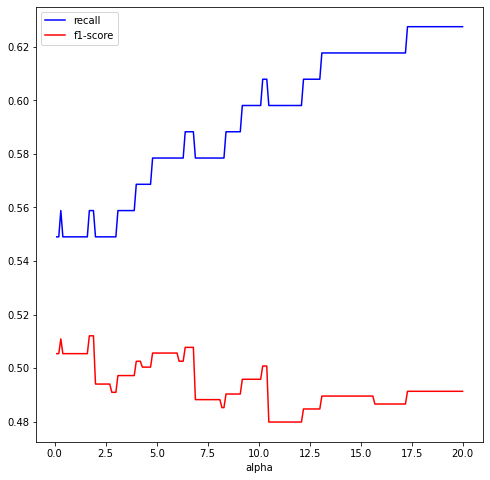

In [321]:
alphas = np.arange(0.1, 20.1, 0.1)

# Neste momento, vamos priorizar o uso das métricas de f1-score e recall para otimizar o modelo, pois essas métricas são mais sensíveis às classes minoritárias
recall = list()
f1 = list()

for a in alphas:

    MNB = MultinomialNB(alpha = a)
    MNB.fit(xtrain, ytrain)

    ypred = MNB.predict(xvalid)

    # utilizando average = 'weighted' para que o recall / f1-score médio seja ponderado pelo número de amostras em cada classe
    recall.append(recall_score(yvalid, ypred, average = 'weighted'))
    f1.append(f1_score(yvalid, ypred, average = 'weighted'))


resultado_mnb = pd.DataFrame({
    'Alpha': alphas,
    'F1': f1,
    'Recall': recall
})

fig, ax = plt.subplots(figsize = (8, 8))

sns.lineplot(data = resultado_mnb, x = 'Alpha', y = 'Recall', color = 'blue', label = 'recall', ax = ax)
sns.lineplot(data = resultado_mnb, x = 'Alpha', y = 'F1', color = 'red', label = 'f1-score', ax = ax)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('')
plt.show()

In [322]:
# Iremos testar os seguintes modelos:

index_models = resultado_mnb[(resultado_mnb.Alpha >= 5) & (resultado_mnb.Alpha <= 10)].drop(columns = 'Alpha').drop_duplicates().index
resultado_mnb.loc[index_models]

,Alpha,F1,Recall
49,5.0,0.505650,0.578431
60,6.1,0.502607,0.578431
63,6.4,0.507772,0.588235
68,6.9,0.488267,0.578431
81,8.2,0.485287,0.578431
83,8.4,0.490361,0.588235
91,9.2,0.495868,0.598039


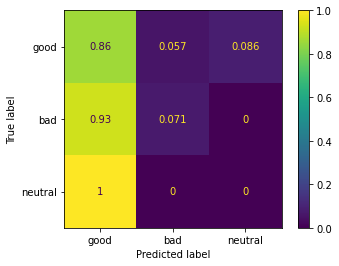

In [305]:
labels = ['good', 'bad', 'neutral']

MNB = MultinomialNB(alpha = 5)
MNB.fit(xtrain, ytrain)

ypred = MNB.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

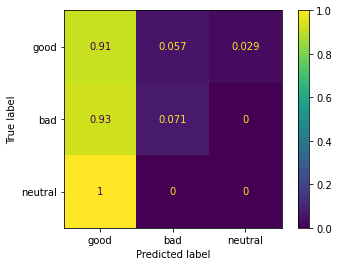

In [306]:
labels = ['good', 'bad', 'neutral']

MNB = MultinomialNB(alpha = 6.9)
MNB.fit(xtrain, ytrain)

ypred = MNB.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

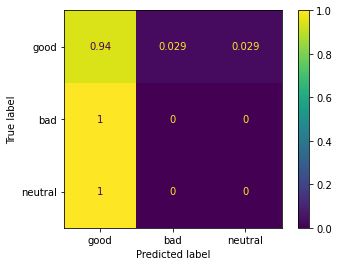

In [307]:
labels = ['good', 'bad', 'neutral']

MNB = MultinomialNB(alpha = 9.2)
MNB.fit(xtrain, ytrain)

ypred = MNB.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


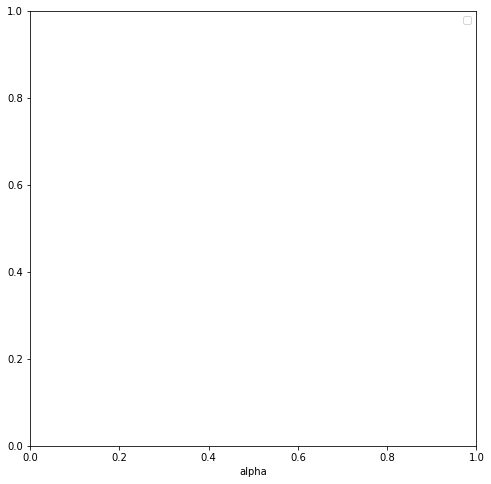

,Alpha,F1,Recall


In [308]:
# Durante a otimização dos hiperparâmetros, vamos incluir uma nova condição: para ser um modelo válido, ele deve acertar ao menos 1 amostra de cada classe:

alphas = np.arange(0.01, 20.01, 0.01)

recall    = list()
f1  = list()
valid_alphas = list()

for a in alphas:

    MNB = MultinomialNB(alpha = a)
    MNB.fit(xtrain, ytrain)

    ypred = MNB.predict(xvalid)

    cm = confusion_matrix(yvalid, ypred)

    if (cm[0][0] > 0) & (cm[1][1] > 0) & (cm[2][2] > 0): 

        recall.append(recall_score(yvalid, ypred, average = 'weighted'))
        f1.append(f1_score(yvalid, ypred, average = 'weighted'))
        valid_alphas.append(a)

resultado_mnb = pd.DataFrame({
    'Alpha': valid_alphas,
    'F1': f1,
    'Recall': recall
})

fig, ax = plt.subplots(figsize = (8, 8))

sns.lineplot(data = resultado_mnb, x = 'Alpha', y = 'Recall', color = 'blue', label = 'recall', ax = ax)
sns.lineplot(data = resultado_mnb, x = 'Alpha', y = 'F1', color = 'red', label = 'f1-score', ax = ax)
plt.legend()
plt.xlabel('alpha')
plt.ylabel('')
plt.show()

# Este modelo não se adequou bem ao conjunto de dados. Não houve uma otimização satisfatória, possivelmente por alguma (s) suposições do algoritmo não ter sido cumprida 
# (independencia de atributos dada uma classe, equidade de relevância de todos os atributos para classificar uma amostra, dados com distribuição multinomial).
resultado_mnb

## Random Forests

#### Otimização

In [310]:
# Escolhendo este algoritmo pois ele lida bem com dados esparços, não pressuõe distribuições específicas nos dados e não pressupõe relações lineares entre as variáveis.
# Como é um algoritmo que pode ser computacionalmente caro, vamos utilizar os dados no formato CSR (Compressed Sparse Row)

xtrain = csr_matrix(xtrain.values)
xvalid = csr_matrix(xvalid.values)
xtest  = csr_matrix(xtest.values)

In [329]:
n_estimators = [15, 30, 45, 60]
max_depth = [5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 5, 10]
max_features = [None, 'sqrt', 'log2']
max_samples = [None, 0.6, 0.8]
bootstrap = [True, False]
criterion = ['gini', 'entropy', 'log_loss']

resultado_rf = pd.DataFrame({
    'n_estimators': [], 
    'max_depth': [], 
    'min_samples_split': [], 
    'min_samples_leaf': [], 
    'max_features': [], 
    'max_samples': [], 
    'bootstrap': [], 
    'criterion': [], 
    'f1': [],
    'recall': []
})

labels = ['good', 'bad', 'neutral']

i = 0
for n in n_estimators:
    for md in max_depth:
        for mss in min_samples_split:
            for msl in min_samples_leaf:
                for mf in max_features:
                    for ms in max_samples:
                        for b in bootstrap:
                            for crit in criterion:

                                try:
                                    rf_model = RandomForestClassifier(
                                        n_estimators = n,
                                        max_depth = md,
                                        min_samples_split = mss,
                                        min_samples_leaf = msl,
                                        max_features = mf, 
                                        max_samples = ms, 
                                        bootstrap = b, 
                                        criterion = crit,
                                        class_weight = 'balanced',
                                        random_state = 1
                                    )

                                    rf_model.fit(xtrain, ytrain)
                                    ypred = rf_model.predict(xvalid)

                                    cm = confusion_matrix(yvalid, ypred, labels = labels, normalize = 'true')
                                    if (cm[0][0] > 0) & (cm[1][1] > 0) & (cm[2][2] > 0): 

                                        resultado_rf = pd.concat([resultado_rf, pd.DataFrame({
                                                                                    'n_estimators': [n], 
                                                                                    'max_depth': [md], 
                                                                                    'min_samples_split': [mss], 
                                                                                    'min_samples_leaf': [msl], 
                                                                                    'max_features': [mf], 
                                                                                    'max_samples': [ms], 
                                                                                    'bootstrap': [b], 
                                                                                    'criterion': [crit], 
                                                                                    'f1': [f1_score(yvalid, ypred, average = 'weighted')],
                                                                                    'recall': [recall_score(yvalid, ypred, average = 'weighted')]
                                                                                })], ignore_index = True)
                                        
                                    if i % 500 == 0:
                                        resultado_rf.to_csv(f'resultado_rf {i}.csv', index = False)
                                    i += 1

                                except Exception as error:
                                    print(' ----------------------------------------------------------------------------------------------------- ')
                                    print('\n\n')
                                    print(error)
                                    print('\n\n')
                                    print(' ----------------------------------------------------------------------------------------------------- ')

resultado_rf.to_csv('resultado_rf final.csv', index = False)

 ----------------------------------------------------------------------------------------------------- 



`max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.



 ----------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------- 



`max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.



 ----------------------------------------------------------------------------------------------------- 
 ----------------------------------------------------------------------------------------------------- 



`max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.



 ----------------------------------------------------------------------------------------------------- 
 ------------------------------

#### Seleção do modelo final

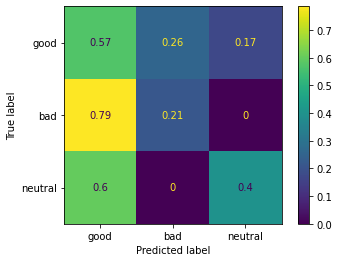

In [343]:
labels = ['good', 'bad', 'neutral']

rf_model = RandomForestClassifier(
    n_estimators = 15,
    max_depth = None,
    min_samples_split = 5,
    min_samples_leaf = 5,
    max_features = 'sqrt', 
    max_samples = 0.8, 
    bootstrap = True, 
    criterion = 'gini',
    class_weight = 'balanced',
    random_state = 1
)

x_train_valid = vstack([xtrain, xvalid])
y_train_valid = pd.concat([ytrain, yvalid])
rf_model.fit(x_train_valid, y_train_valid)
ypred = rf_model.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

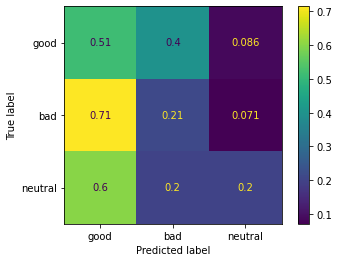

In [337]:
labels = ['good', 'bad', 'neutral']

rf_model = RandomForestClassifier(
    n_estimators = 30,
    max_depth = 5,
    min_samples_split = 2,
    min_samples_leaf = 2,
    max_features = 'sqrt', 
    max_samples = None, 
    bootstrap = True, 
    criterion = 'gini',
    class_weight = 'balanced',
    random_state = 1
)

x_train_valid = vstack([xtrain, xvalid])
y_train_valid = pd.concat([ytrain, yvalid])
rf_model.fit(x_train_valid, y_train_valid)
ypred = rf_model.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

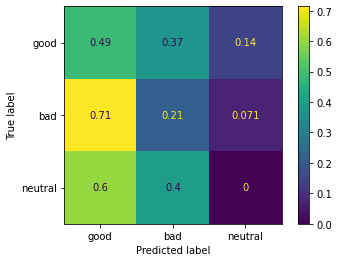

In [338]:
labels = ['good', 'bad', 'neutral']

rf_model = RandomForestClassifier(
    n_estimators = 60,
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5,
    max_features = 'sqrt', 
    max_samples = 0.6, 
    bootstrap = True, 
    criterion = 'entropy',
    class_weight = 'balanced',
    random_state = 1
)

x_train_valid = vstack([xtrain, xvalid])
y_train_valid = pd.concat([ytrain, yvalid])
rf_model.fit(x_train_valid, y_train_valid)
ypred = rf_model.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

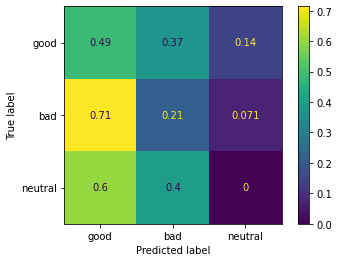

In [339]:
labels = ['good', 'bad', 'neutral']

rf_model = RandomForestClassifier(
    n_estimators = 60,
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5,
    max_features = 'sqrt', 
    max_samples = 0.6, 
    bootstrap = True, 
    criterion = 'log_loss',
    class_weight = 'balanced',
    random_state = 1
)

x_train_valid = vstack([xtrain, xvalid])
y_train_valid = pd.concat([ytrain, yvalid])
rf_model.fit(x_train_valid, y_train_valid)
ypred = rf_model.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

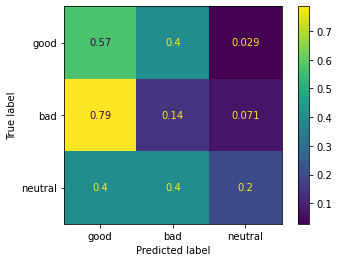

In [340]:
labels = ['good', 'bad', 'neutral']

rf_model = RandomForestClassifier(
    n_estimators = 15,
    max_depth = 10,
    min_samples_split = 5,
    min_samples_leaf = 2,
    max_features = None, 
    max_samples = 0.8, 
    bootstrap = True, 
    criterion = 'gini',
    class_weight = 'balanced',
    random_state = 1
)

x_train_valid = vstack([xtrain, xvalid])
y_train_valid = pd.concat([ytrain, yvalid])
rf_model.fit(x_train_valid, y_train_valid)
ypred = rf_model.predict(xtest)

cm = confusion_matrix(ytest, ypred, labels = labels, normalize = 'true')
ConfusionMatrixDisplay(cm, display_labels = labels).plot()

#### Exportação do modelo

In [344]:
import joblib

In [355]:
skills = ['Physical Skills', 'Energy Manipulation', 'Elemental Powers', 'Mental and Psychic Powers', 'Space-Time Manipulation',
        'Body Transformation', 'Supernatural Forces', 'Tech Skills', 'Perception Skills', 'Locomotion Skills', 'Combat Skills']

races = ['Race_group_by_Alien', 'Race_group_by_Artificial Beings', 'Race_group_by_Divine and Semidivine', 'Race_group_by_Genetically Altered Beings',
    'Race_group_by_Human and Variation', 'Race_group_by_Mythical', 'Race_group_by_Not Identified', 'Race_group_by_Underwater']

heroes2_normalized.columns

Index(['Physical Skills', 'Energy Manipulation', 'Elemental Powers',
       'Mental and Psychic Powers', 'Space-Time Manipulation',
       'Body Transformation', 'Supernatural Forces', 'Tech Skills',
       'Perception Skills', 'Locomotion Skills', 'Combat Skills',
       'Gender_Female', 'Gender_Male', 'Race_group_by_Alien',
       'Race_group_by_Artificial Beings',
       'Race_group_by_Divine and Semidivine',
       'Race_group_by_Genetically Altered Beings',
       'Race_group_by_Human and Variation', 'Race_group_by_Mythical',
       'Race_group_by_Not Identified', 'Race_group_by_Underwater',
       'Eye_Color_group_by_-', 'Eye_Color_group_by_blue',
       'Eye_Color_group_by_brown', 'Eye_Color_group_by_green',
       'Eye_Color_group_by_red', 'Hair_Color_group_by_-',
       'Hair_Color_group_by_Black', 'Hair_Color_group_by_Brown',
       'Hair_Color_group_by_No Hair', 'Hair_Color_group_by_Red', 'Height',
       'Weight', 'Publisher_group_by_DC Comics',
       'Publisher_group_by_M